# K-Means 클러스터링

데이터의 종속 변수 값을 예측하는 것이 아니라 독립 변수의 특성만으로 데이터의 그룹 즉, 클러스터(cluster)를 형성하는 작업을 클러스터링(clustering)이라고 한다.

## K-Means

K-Means 클러스터링 알고리즘은 가장 단순하고 빠른 클러스터링 알고리즘의 하나이다. 

기본적인 방법은 다음과 같은 목적함수 값이 최소화될 때까지 클러스터의 수 $K$와 각 클러스터의 중심(centroid) $\mu_k$를 반복해서 찾는 것이다. 이 값을 inertia라고도 한다.

$$ J = \sum_{k=1}^K \sum_{i \in C_k} d(x_i, \mu_k)  $$

이 식에서 $d$는 두 데이터의 유사도 함수(Similarity Function) 혹은 거리(Distance)로 다음과 같이 정의한다.

$$ d(x_i, \mu_k) = || x_i - \mu_k ||^2 $$

세부 알고리즘은 다음과 같다.


1. 임의의 중심값 $\mu_k$ 를 고른다. (보통 데이터 샘플 중의 하나를 선택)
2. 중심에서 각 샘플 데이터까지의 거리를 계산
3. 각 데이터 샘플에서 가장 가까운 중심을 선택하여 클러스터 갱신
4. 다시 만들어진 클러스터에 대해 중심을 다시 계산하고 1 ~ 4를 반복한다.

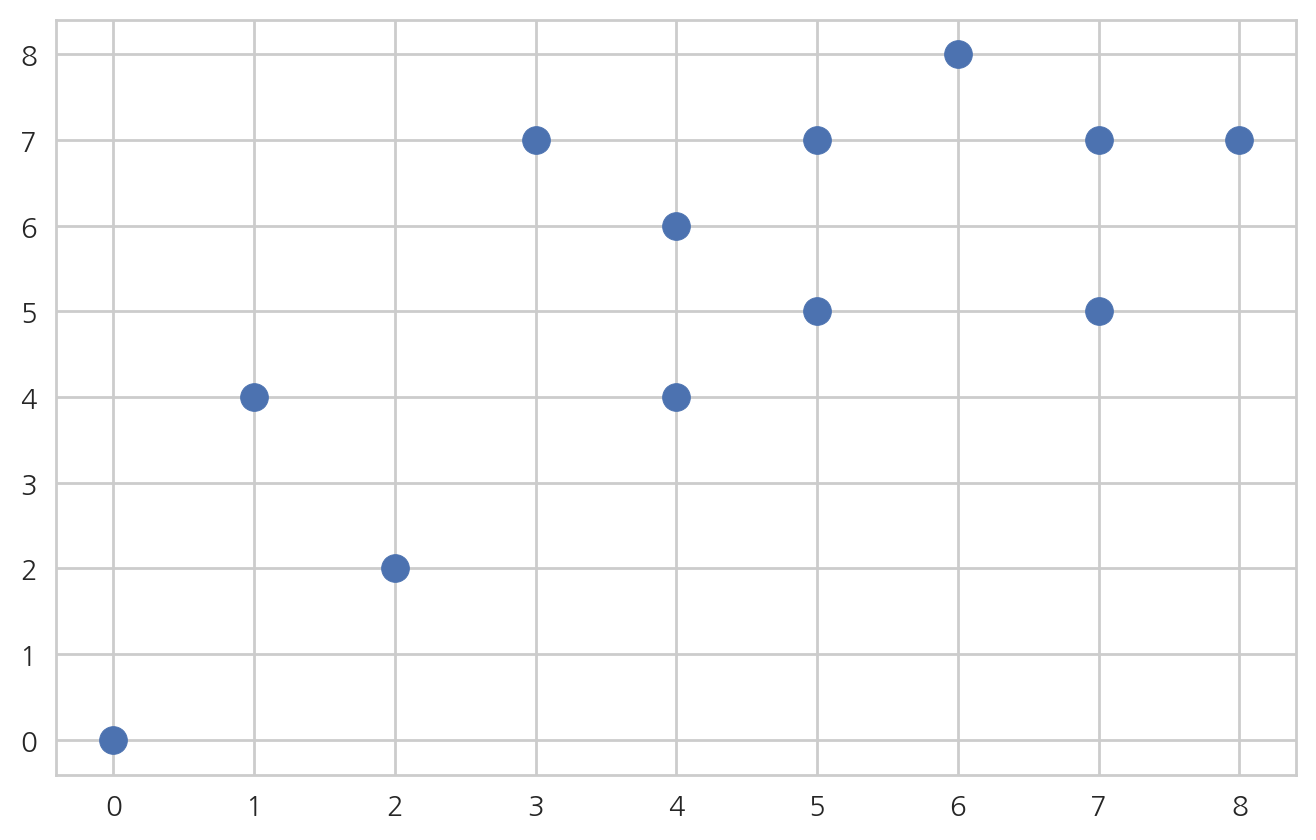

In [2]:
X = np.array([[7, 5],[5, 7],[7, 7],[4, 4],[4, 6],[1, 4],[0, 0],[2, 2],[8, 7],[6, 8],[5, 5],[3, 7]])
plt.scatter(X[:,0], X[:,1], s=100)
plt.show()

In [4]:
from sklearn.cluster import KMeans
model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=1, random_state=1).fit(X)

[ 6.6  6.8] [ 2.71428571  4.        ]


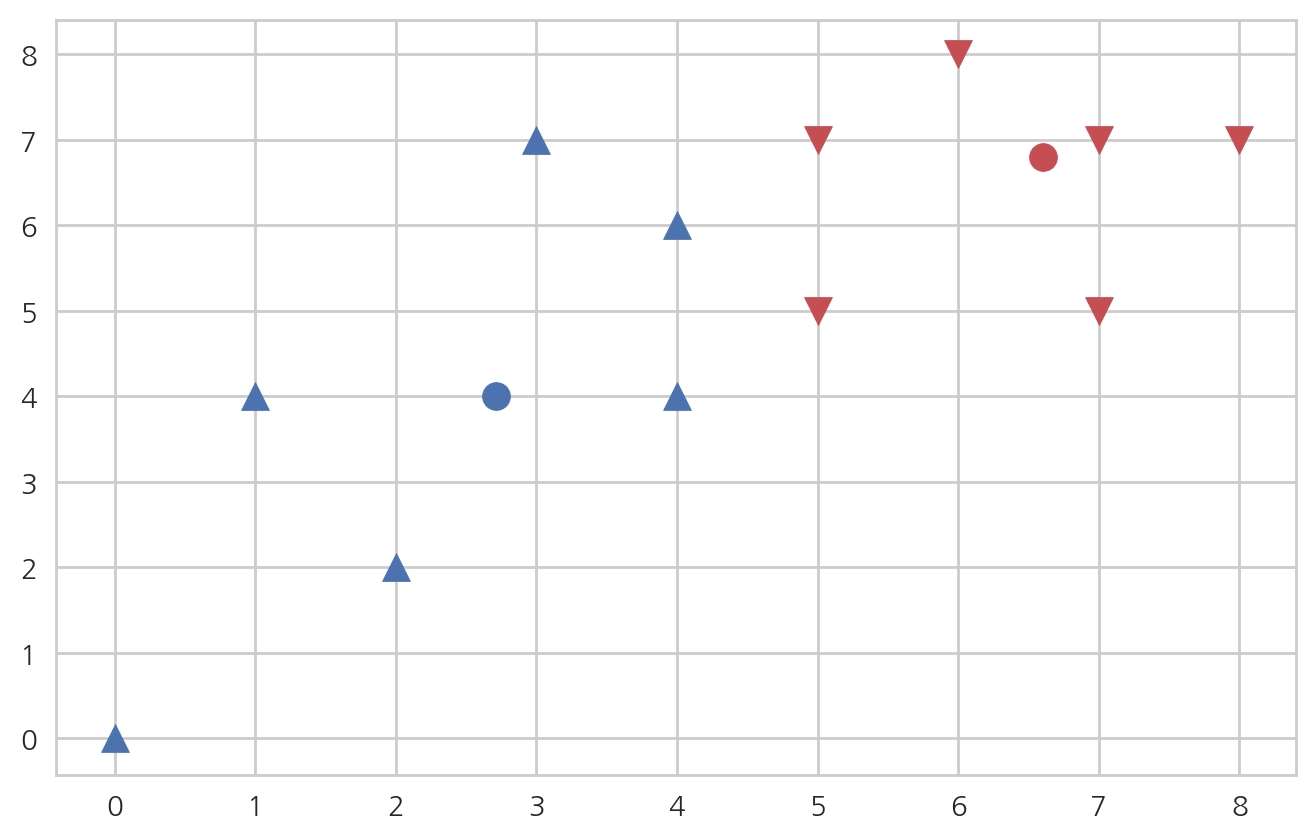

In [5]:
c0, c1 = model.cluster_centers_
print(c0, c1)
plt.scatter(X[model.labels_==0,0], X[model.labels_==0,1], s=100, marker='v', c='r')
plt.scatter(X[model.labels_==1,0], X[model.labels_==1,1], s=100, marker='^', c='b')
plt.scatter(c0[0], c0[1], s=100, c="r")
plt.scatter(c1[0], c1[1], s=100, c="b")
plt.show()

In [6]:
def kmeans_df(c0, c1):
    df = pd.DataFrame(np.hstack([X, 
                                np.linalg.norm(X - c0, axis=1)[:, np.newaxis], 
                                np.linalg.norm(X - c1, axis=1)[:, np.newaxis], 
                                model.labels_[:, np.newaxis]]),
                    columns=["x0", "x1", "d0", "d1", "c"])
    return df

kmeans_df(c0, c1)

,x0,x1,d0,d1,c
0,7.0,5.0,1.843909,4.400835,0.0
1,5.0,7.0,1.612452,3.771537,0.0
2,7.0,7.0,0.447214,5.231381,0.0
3,4.0,4.0,3.820995,1.285714,1.0
4,4.0,6.0,2.720294,2.377617,1.0
5,1.0,4.0,6.260990,1.714286,1.0
6,0.0,0.0,9.476286,4.833978,1.0
7,2.0,2.0,6.648308,2.123724,1.0
8,8.0,7.0,1.414214,6.077728,0.0
9,6.0,8.0,1.341641,5.176477,0.0


In [7]:
print(X[model.labels_==0,0].mean(), X[model.labels_==0,1].mean())
print(X[model.labels_==1,0].mean(), X[model.labels_==1,1].mean())

6.33333333333 6.5
2.33333333333 3.83333333333


In [8]:
model.score(X)

-63.00408163265304

[ 1.  2.] [ 5.44444444  6.22222222]


,x0,x1,d0,d1,c
0,7.0,5.0,6.708204,1.978277,1.0
1,5.0,7.0,6.403124,0.895806,1.0
2,7.0,7.0,7.810250,1.739164,1.0
3,4.0,4.0,3.605551,2.650413,1.0
4,4.0,6.0,5.000000,1.461438,1.0
5,1.0,4.0,2.000000,4.969040,0.0
6,0.0,0.0,2.236068,8.267891,0.0
7,2.0,2.0,1.000000,5.448978,0.0
8,8.0,7.0,8.602325,2.671292,1.0
9,6.0,8.0,7.810250,1.862562,1.0


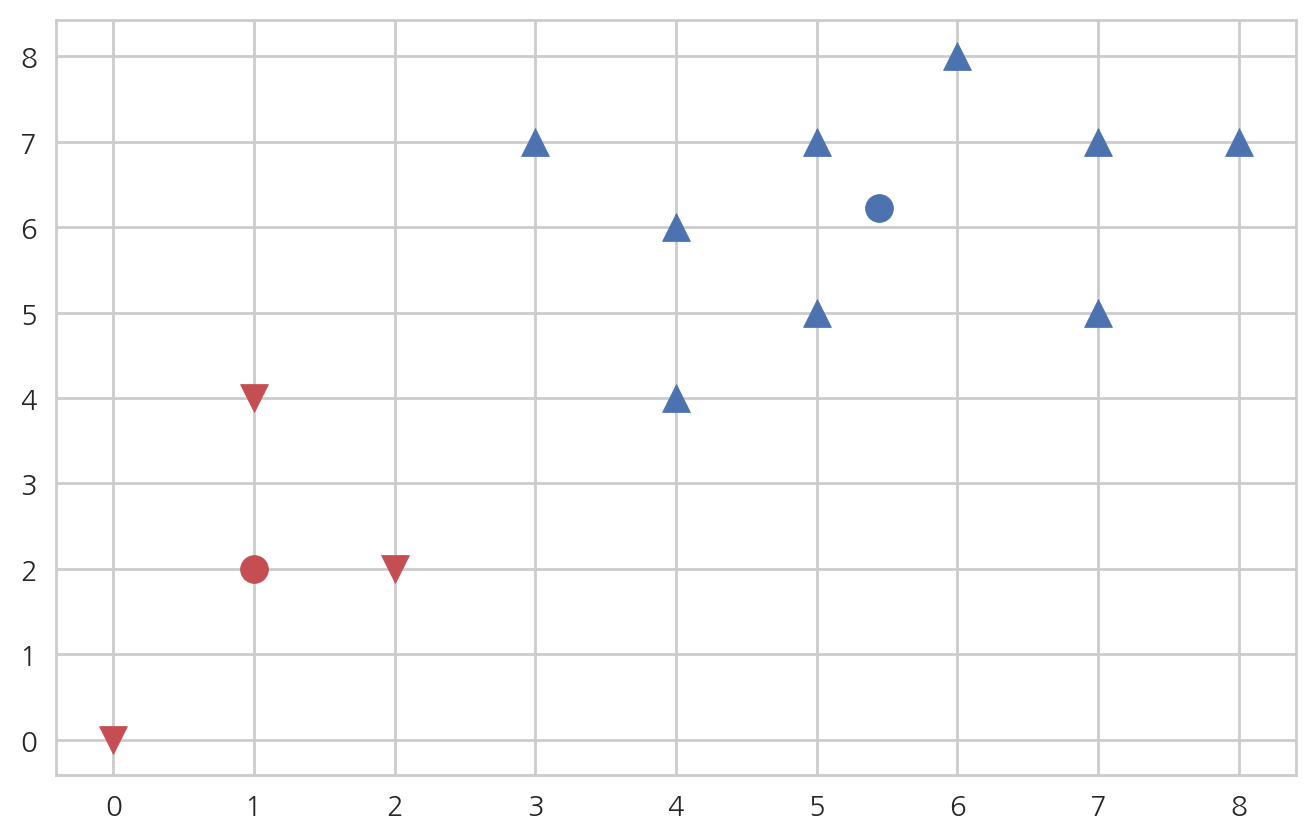

In [9]:
model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=2, random_state=0).fit(X)
c0, c1 = model.cluster_centers_
print(c0, c1)
plt.scatter(X[model.labels_==0,0], X[model.labels_==0,1], s=100, marker='v', c='r')
plt.scatter(X[model.labels_==1,0], X[model.labels_==1,1], s=100, marker='^', c='b')
plt.scatter(c0[0], c0[1], s=100, c="r")
plt.scatter(c1[0], c1[1], s=100, c="b")
kmeans_df(c0, c1)

In [10]:
model.score(X)

-45.777777777777715

In [11]:
(np.linalg.norm(X[model.labels_==0] - c0, axis=1)**2).sum() + \
(np.linalg.norm(X[model.labels_==1] - c1, axis=1)**2).sum()

45.777777777777779

[ 1.  2.] [ 5.44444444  6.22222222]


,x0,x1,d0,d1,c
0,7.0,5.0,6.708204,1.978277,1.0
1,5.0,7.0,6.403124,0.895806,1.0
2,7.0,7.0,7.810250,1.739164,1.0
3,4.0,4.0,3.605551,2.650413,1.0
4,4.0,6.0,5.000000,1.461438,1.0
5,1.0,4.0,2.000000,4.969040,0.0
6,0.0,0.0,2.236068,8.267891,0.0
7,2.0,2.0,1.000000,5.448978,0.0
8,8.0,7.0,8.602325,2.671292,1.0
9,6.0,8.0,7.810250,1.862562,1.0


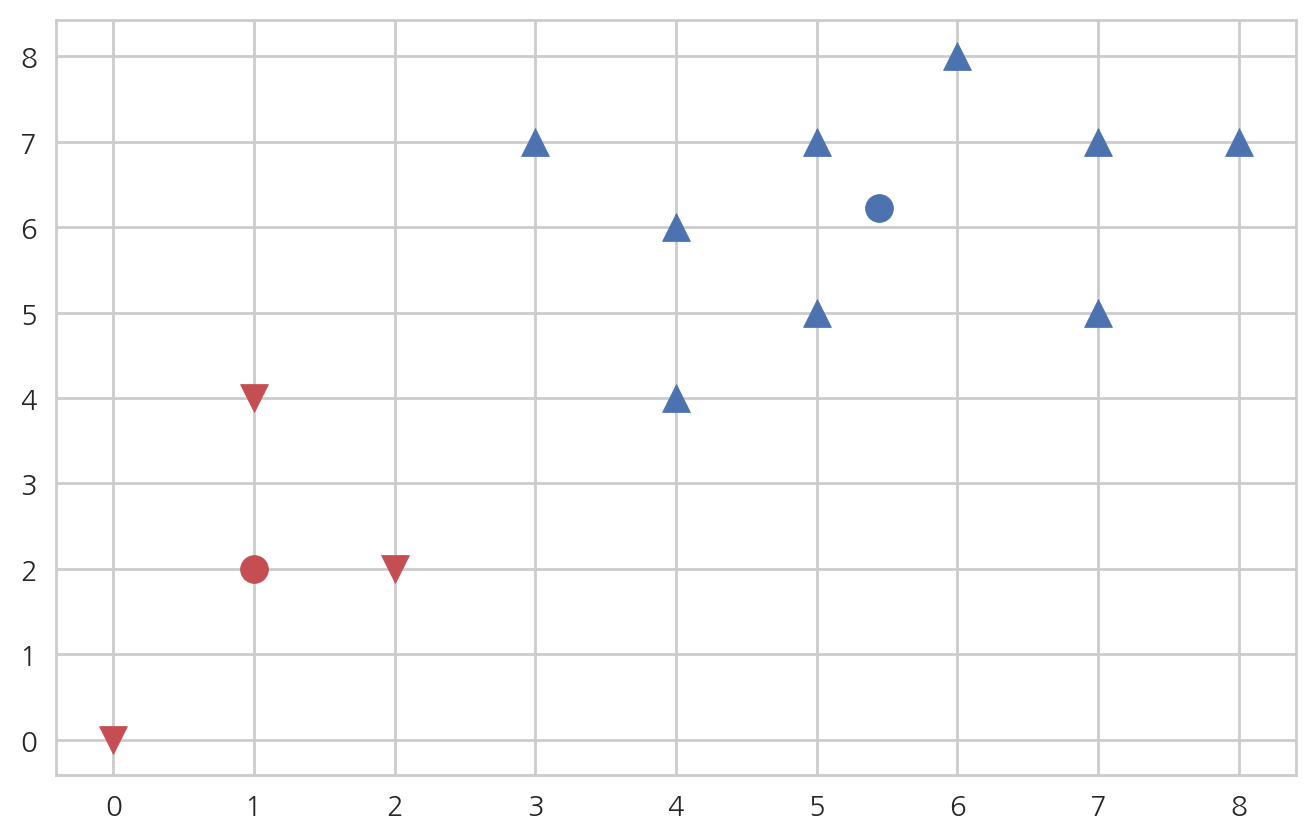

In [12]:
model = KMeans(n_clusters=2, init="random", n_init=1, max_iter=100, random_state=0).fit(X)
c0, c1 = model.cluster_centers_
print(c0, c1)
plt.scatter(X[model.labels_==0,0], X[model.labels_==0,1], s=100, marker='v', c='r')
plt.scatter(X[model.labels_==1,0], X[model.labels_==1,1], s=100, marker='^', c='b')
plt.scatter(c0[0], c0[1], s=100, c="r")
plt.scatter(c1[0], c1[1], s=100, c="b")
kmeans_df(c0, c1)

## K-Means++

K-Means++ 알고리즘은 최초의 중심값을 설정하기 위한 알고리즘이다.


1. 중심값을 저장할 집합 $M$ 준비
2. 일단 하나의 중심 $\mu_0$를 랜덤하게 선택하여 $M$에 넣는다.
3. $M$에 속하지 않는 모든 샘플 $x_i$에 대해 거리 $d(M, x_i)$를 계산. $d(M, x_i)$는 $M$안의 모든 샘플 $\mu_k$에 대해  $d(\mu_k, x_i)$를 계산하여 가장 작은 값 선택
4. $d(M, x_i)$에 비례한 확률로 다음 중심 $\mu$를 선택.
5. $K$개의 중심을 선택할 때까지 반복
6. K-Means 알고리즘 사용

### 예: Iris

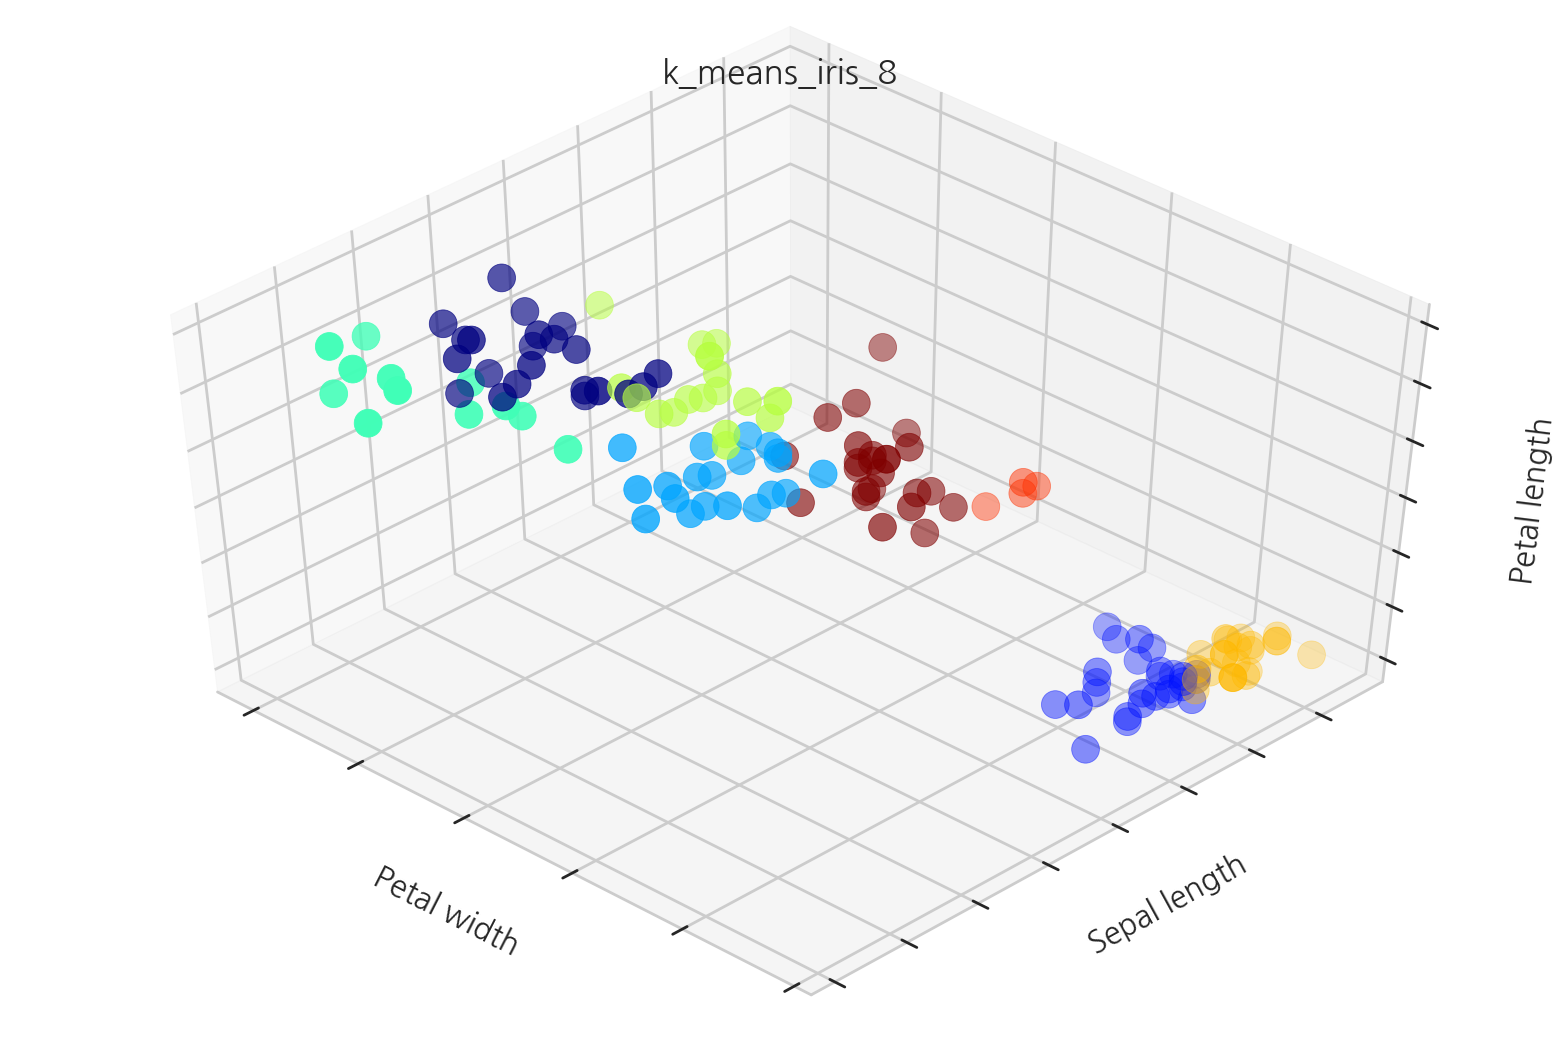

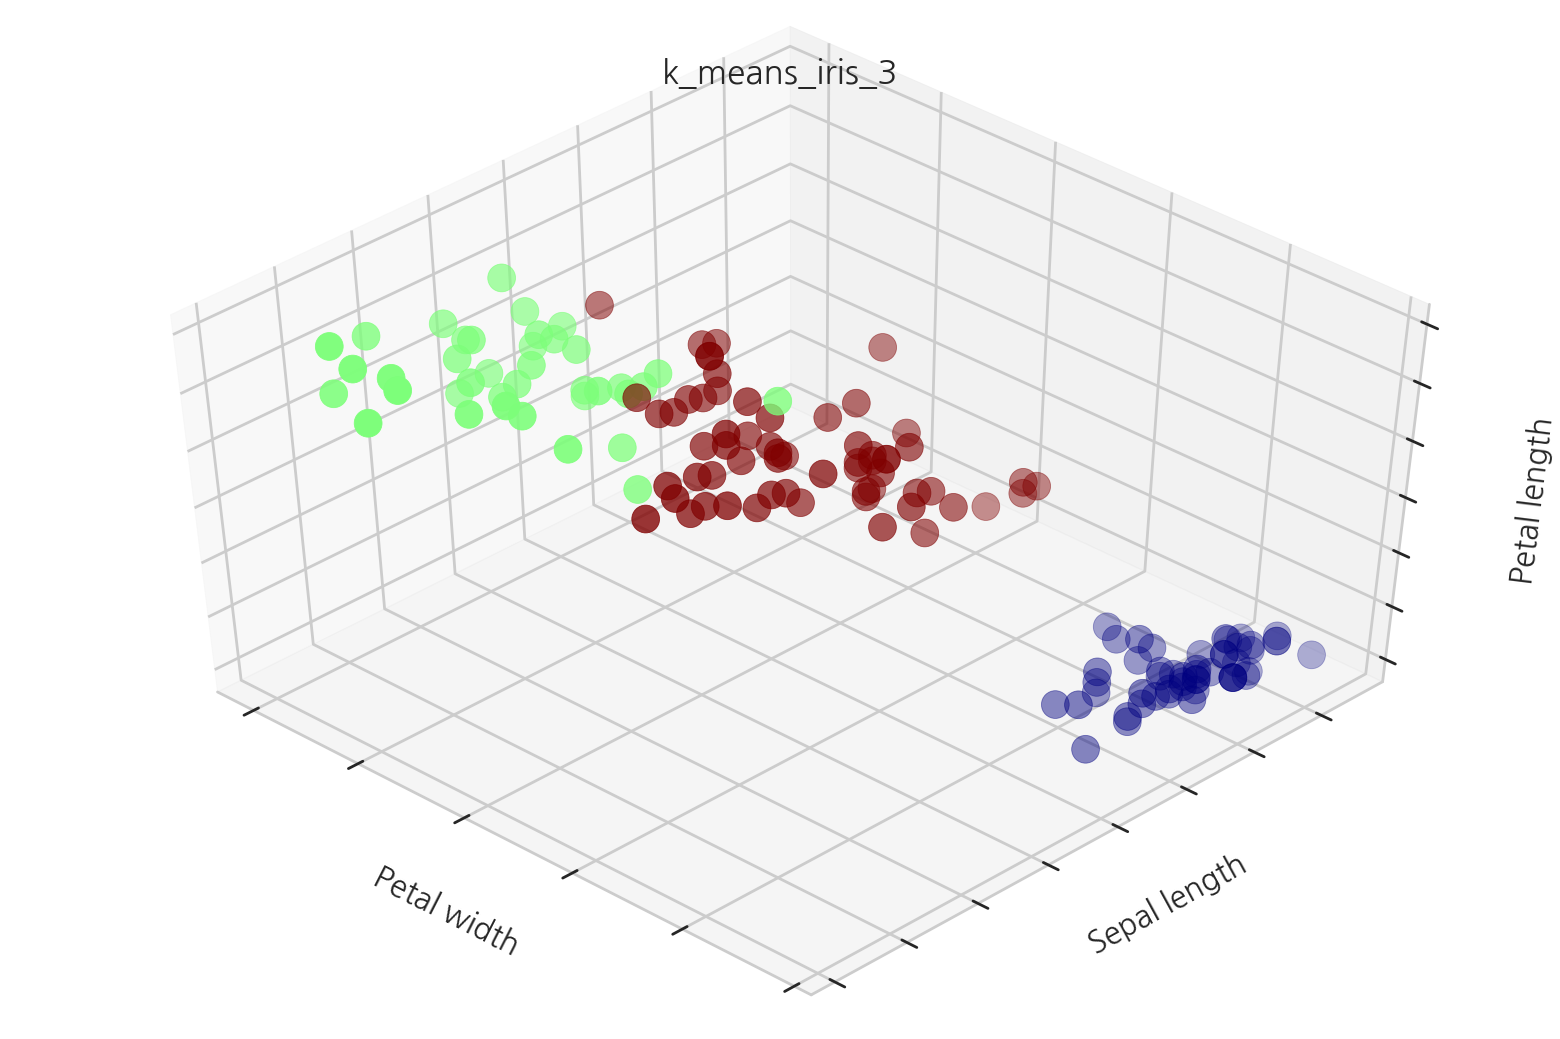

In [13]:
from mpl_toolkits.mplot3d import Axes3D
from sklearn.cluster import KMeans
from sklearn import datasets

np.random.seed(5)
centers = [[1, 1], [-1, -1], [1, -1]]
iris = datasets.load_iris()
X = iris.data
y = iris.target

estimators = {'k_means_iris_3': KMeans(n_clusters=3),
              'k_means_iris_8': KMeans(n_clusters=8)}

fignum = 1
for name, est in estimators.items():
    fig = plt.figure(fignum)
    plt.clf()
    ax = Axes3D(fig, rect=[0, 0, .95, 1], elev=48, azim=134)
    plt.cla()
    est.fit(X)
    labels = est.labels_
    ax.scatter(X[:, 3], X[:, 0], X[:, 2], c=labels.astype(np.float), s=100, cmap=mpl.cm.jet)
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.w_zaxis.set_ticklabels([])
    ax.set_xlabel('Petal width')
    ax.set_ylabel('Sepal length')
    ax.set_zlabel('Petal length')
    plt.title(name)
    fignum = fignum + 1

plt.show()

### 예: Digit Image

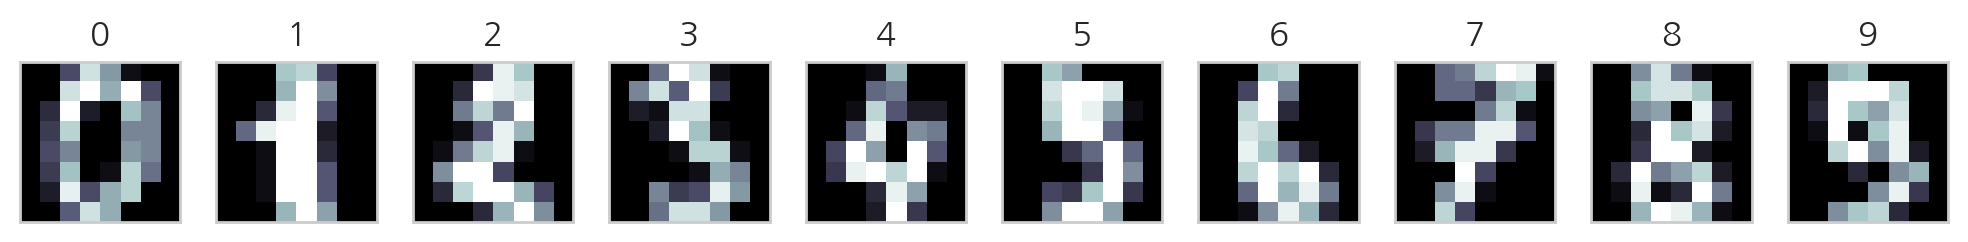

In [14]:
from sklearn.datasets import load_digits
from sklearn.preprocessing import scale

digits = load_digits()
data = scale(digits.data)

def print_digits(images, labels):
    f = plt.figure(figsize=(10,2))
    plt.subplots_adjust(top=1, bottom=0, hspace=0, wspace=0.05)
    i = 0
    while (i < 10 and i < images.shape[0]):
        ax = f.add_subplot(1, 10, i + 1)
        ax.imshow(images[i], cmap=plt.cm.bone)
        ax.grid(False)
        ax.table
        ax.set_title(labels[i])
        ax.xaxis.set_ticks([])
        ax.yaxis.set_ticks([])
        plt.tight_layout()
        i += 1

print_digits(digits.images, range(10))

In [16]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test, images_train, images_test = \
    train_test_split(data, digits.target, digits.images, test_size=0.25, random_state=42)

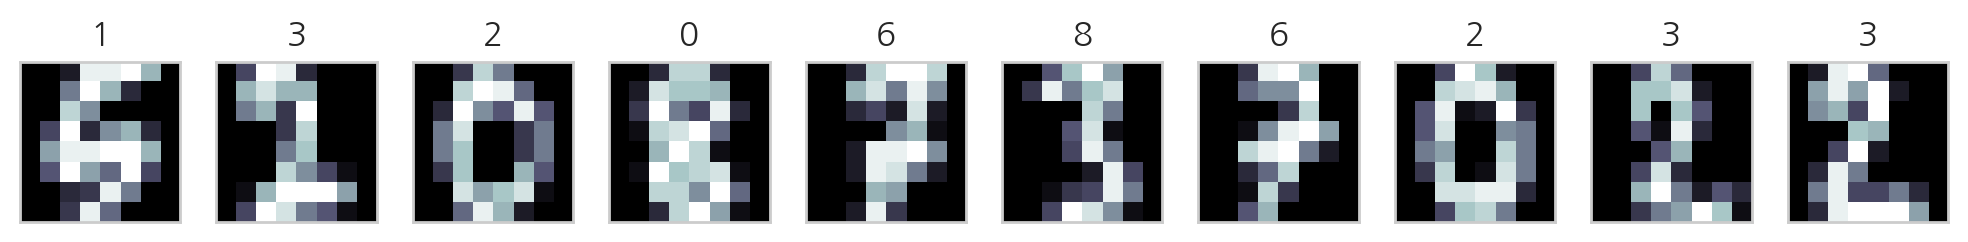

In [17]:
from sklearn.cluster import KMeans
clf = KMeans(init="k-means++", n_clusters=10, random_state=42)
clf.fit(X_train)
print_digits(images_train, clf.labels_)

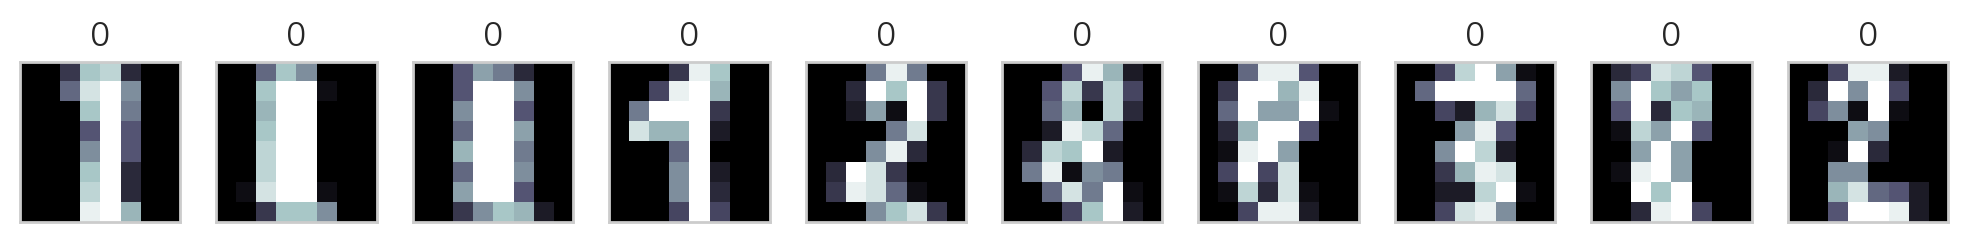

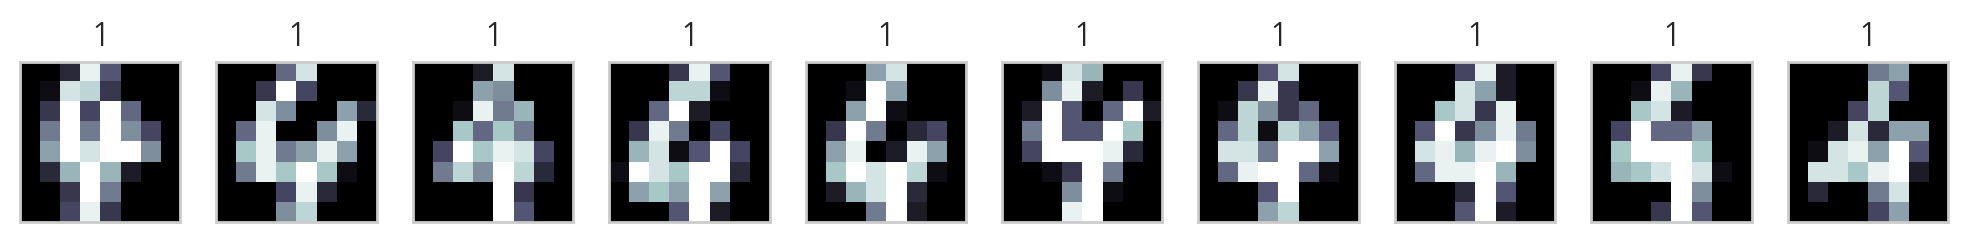

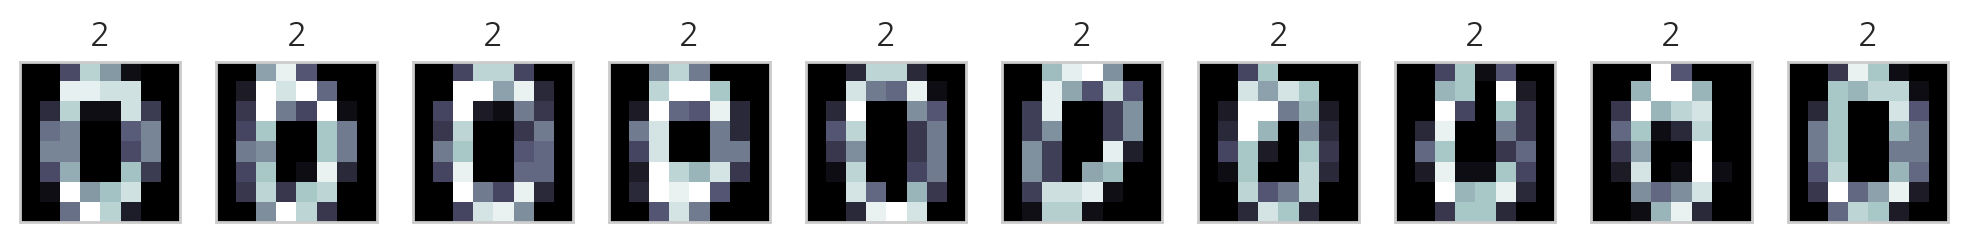

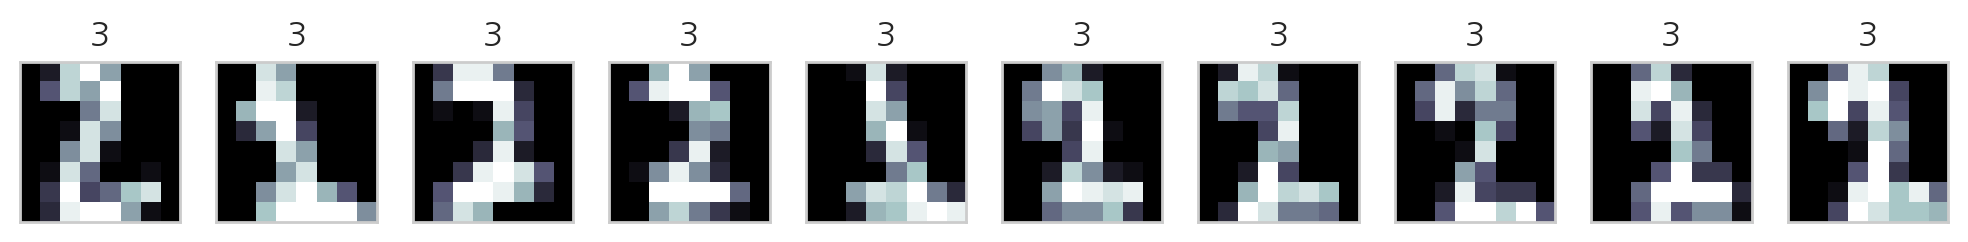

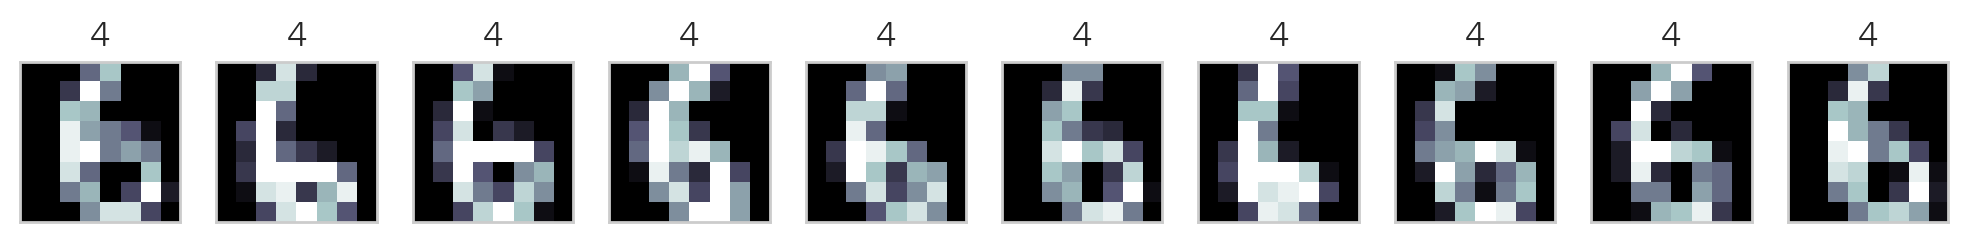

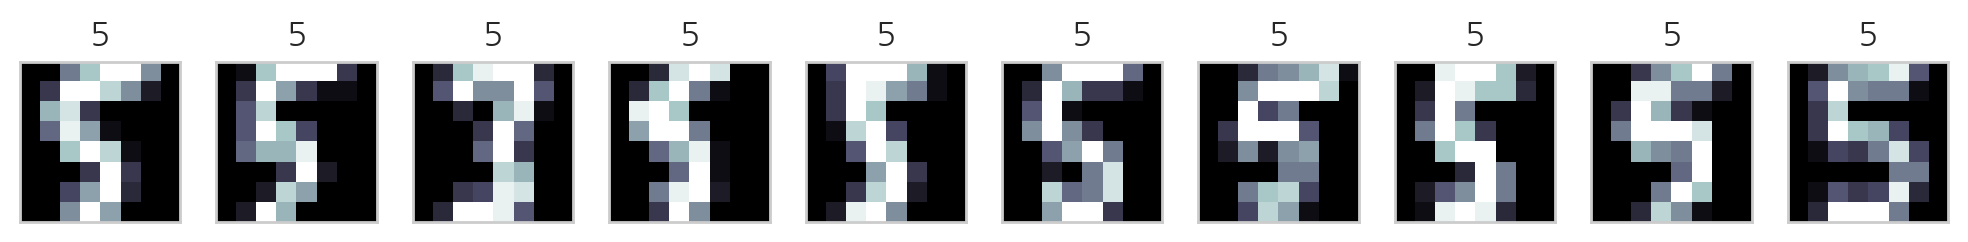

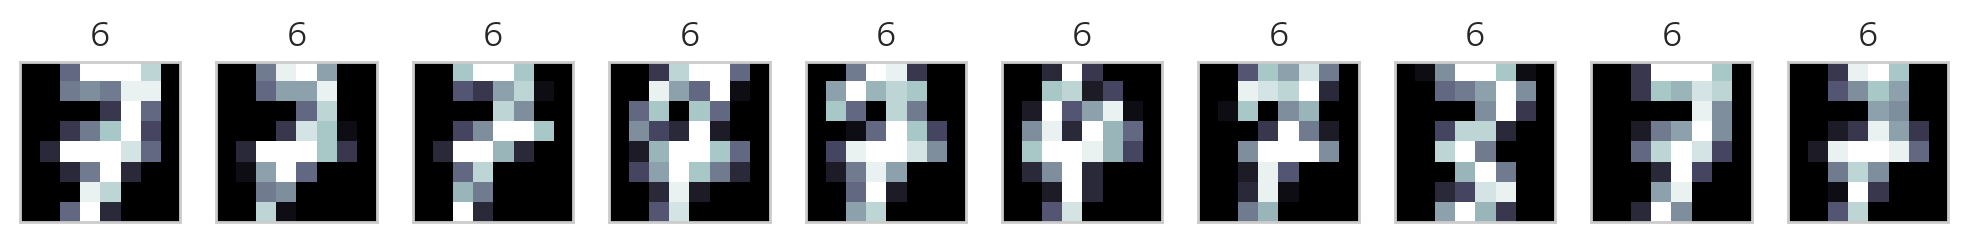

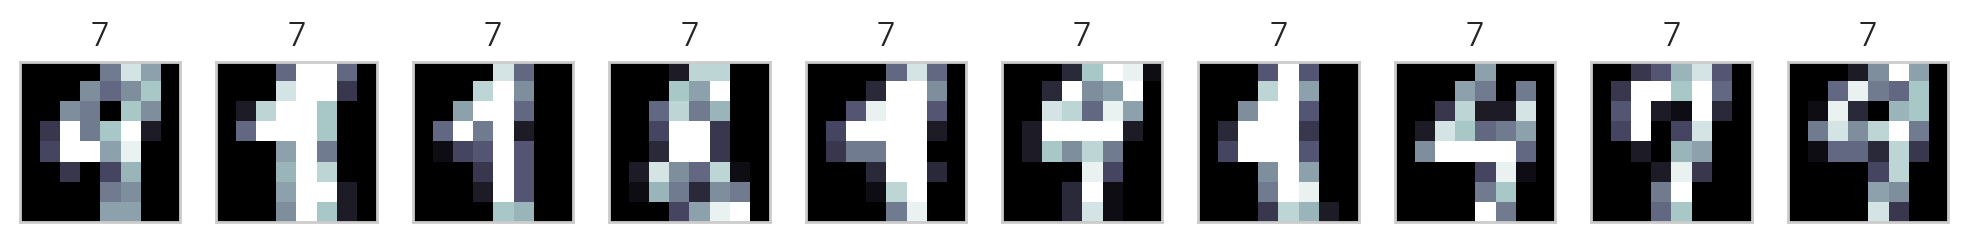

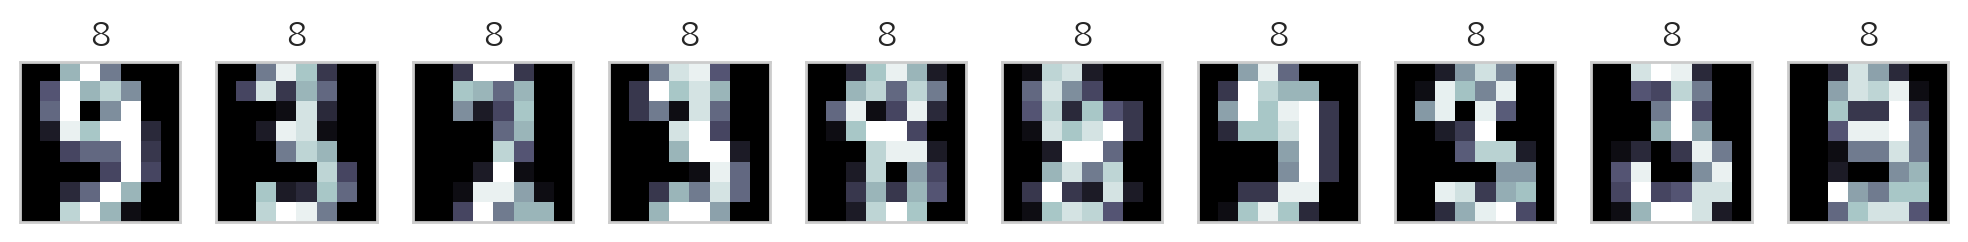

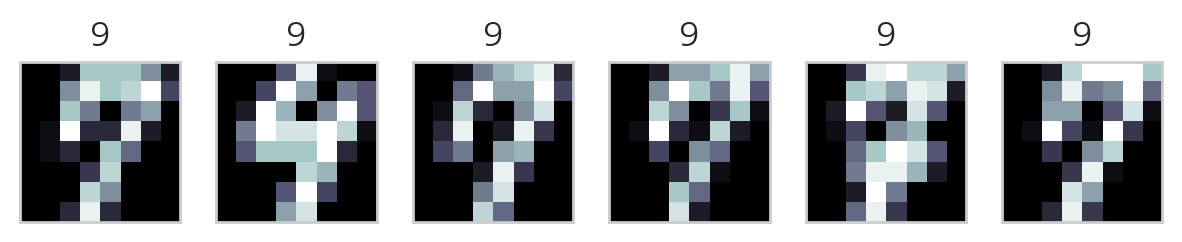

In [18]:
y_pred = clf.predict(X_test)
def print_cluster(images, y_pred, cluster_number):
    images = images[y_pred == cluster_number]
    y_pred = y_pred[y_pred == cluster_number]
    print_digits(images, y_pred)
for i in range(10):
    print_cluster(images_test, y_pred, i)

In [19]:
from sklearn.metrics import confusion_matrix
confusion_matrix(y_test, y_pred)

array([[ 0,  0, 43,  0,  0,  0,  0,  0,  0,  0],
       [20,  0,  0,  7,  0,  0,  0, 10,  0,  0],
       [ 5,  0,  0, 31,  0,  0,  0,  1,  1,  0],
       [ 1,  0,  0,  1,  0,  1,  4,  0, 39,  0],
       [ 1, 50,  0,  0,  0,  0,  1,  2,  0,  1],
       [ 1,  0,  0,  0,  1, 41,  0,  0, 16,  0],
       [ 0,  0,  1,  0, 44,  0,  0,  0,  0,  0],
       [ 0,  0,  0,  0,  0,  1, 34,  1,  0,  5],
       [21,  0,  0,  0,  0,  3,  1,  2, 11,  0],
       [ 0,  0,  0,  0,  0,  2,  3,  3, 40,  0]])

## 클러스터링 성능 기준

* 정확한 답(클러스터의 갯수 및 소속)을 알고 있는 경우
    * Adjusted Rand index
    * Adjusted Mutual Information
    * Homogeneity, completeness and V-measure
    * Fowlkes-Mallows scores
    
    
    
* 정확한 답(클러스터의 갯수 및 소속)을 모르는 경우
    * Silhouette Coefficient
    * Calinski-Harabaz Index

### 예: Silhouette Coefficient

$$ s = \dfrac{b - a}{\max{(a, b)}} $$

* $a$ : 같은 클러스터에 속한 원소들의 평균 거리
* $b$ : 다른 클러스터 중 가장 가까운 클러스터까지의 평균 거리

* http://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

Automatically created module for IPython interactive environment
For n_clusters = 2 The average silhouette_score is : 0.704978749608


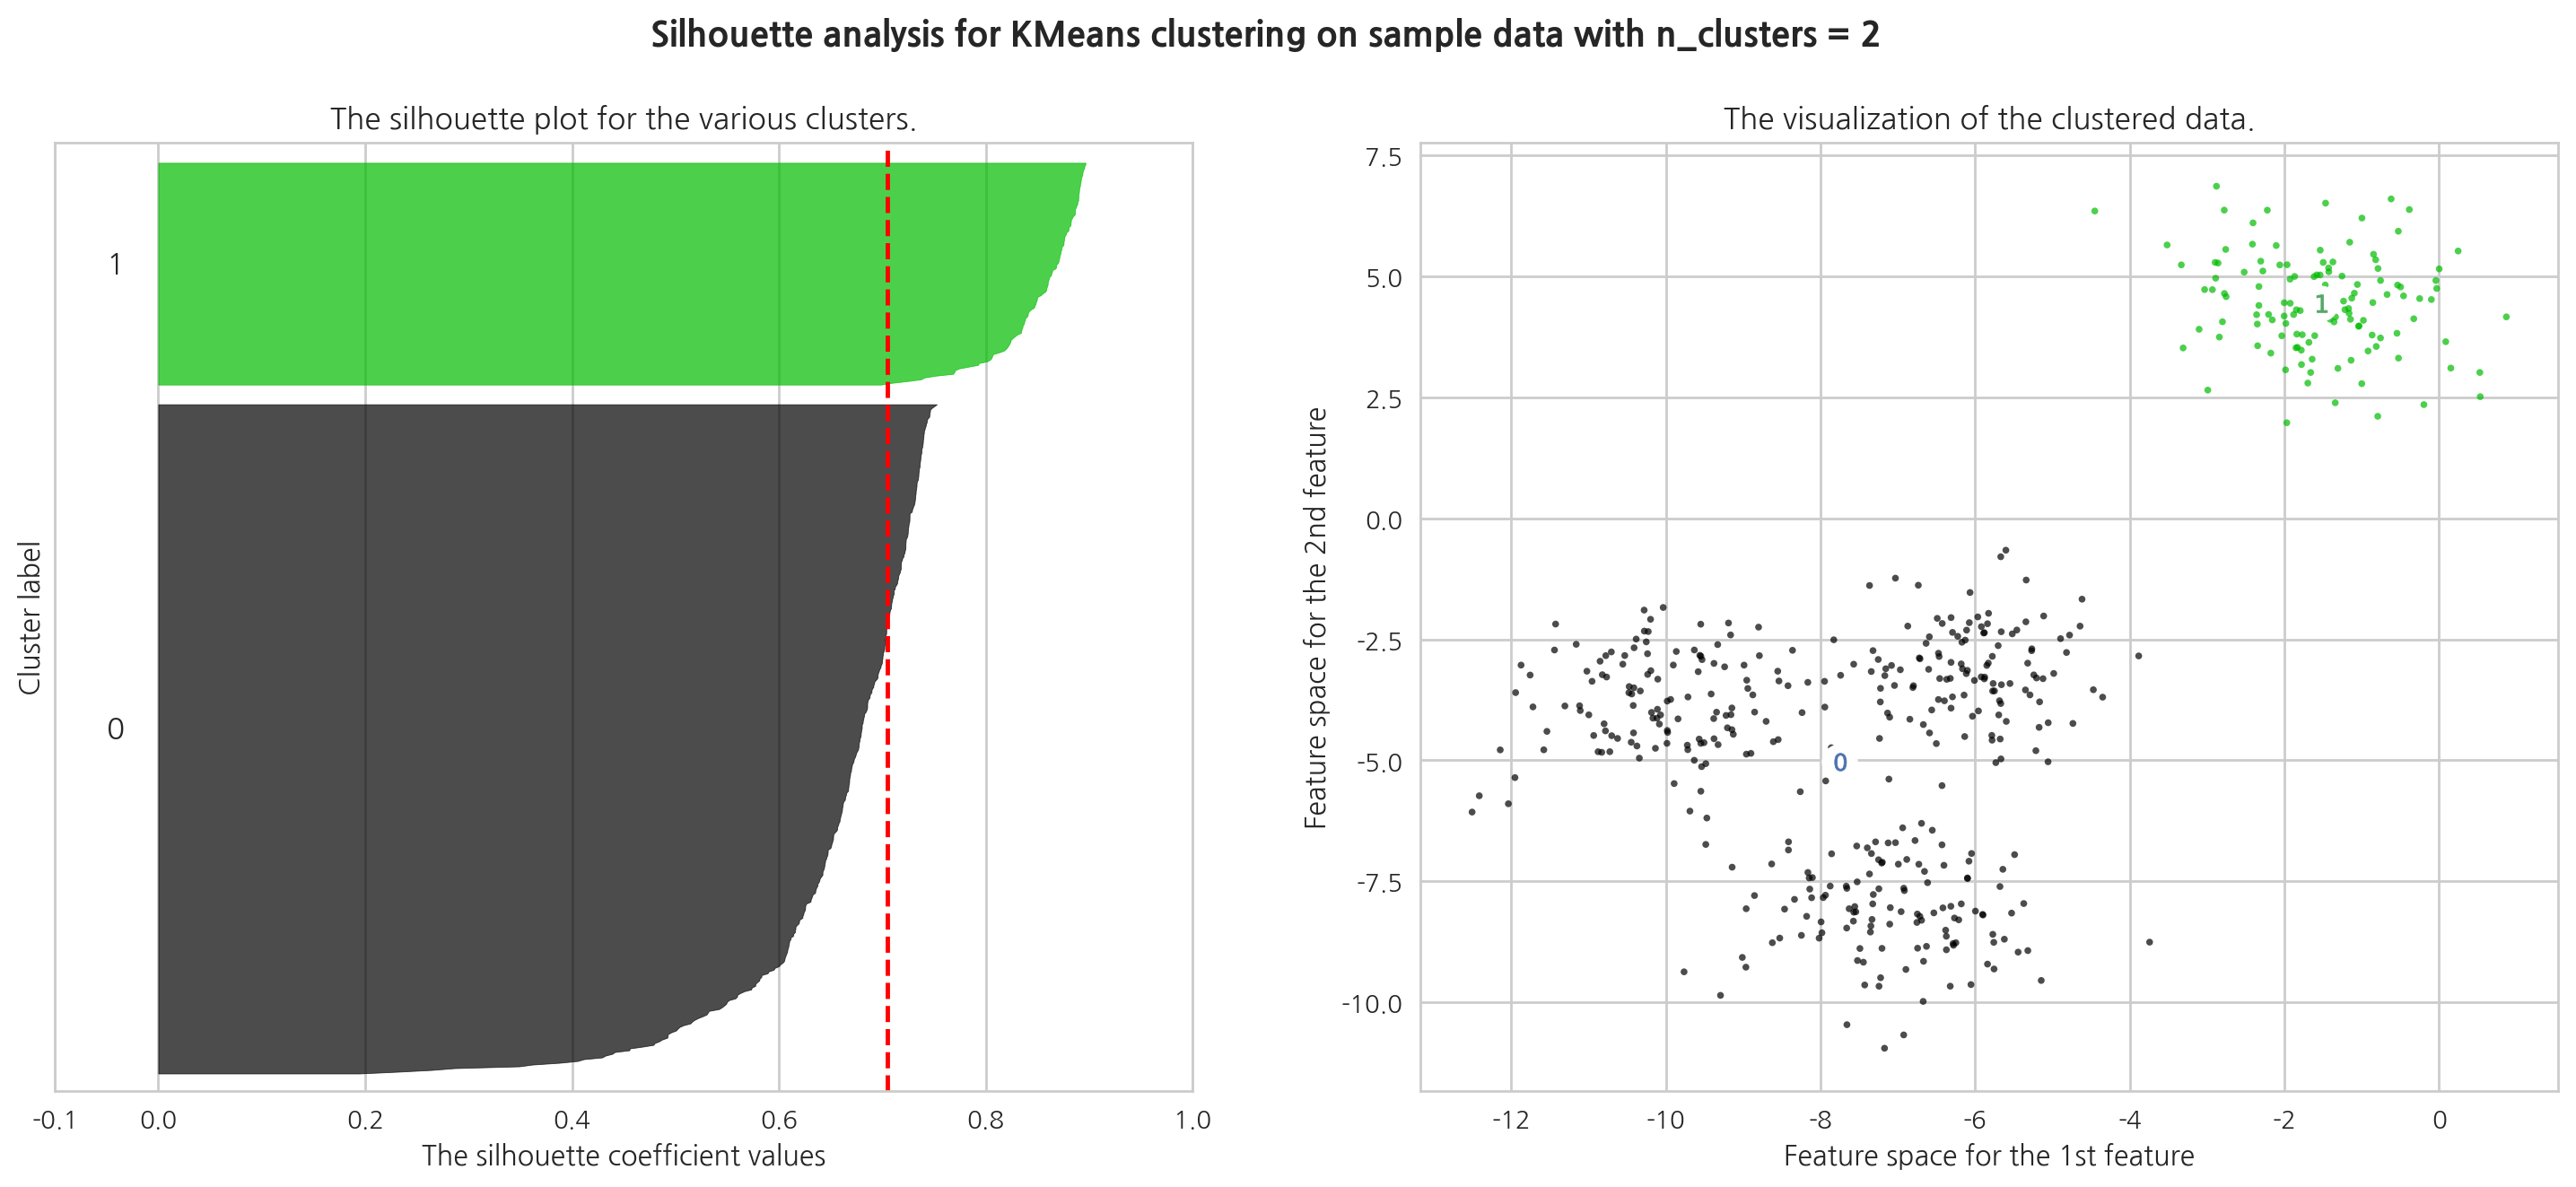

For n_clusters = 3 The average silhouette_score is : 0.588200401213


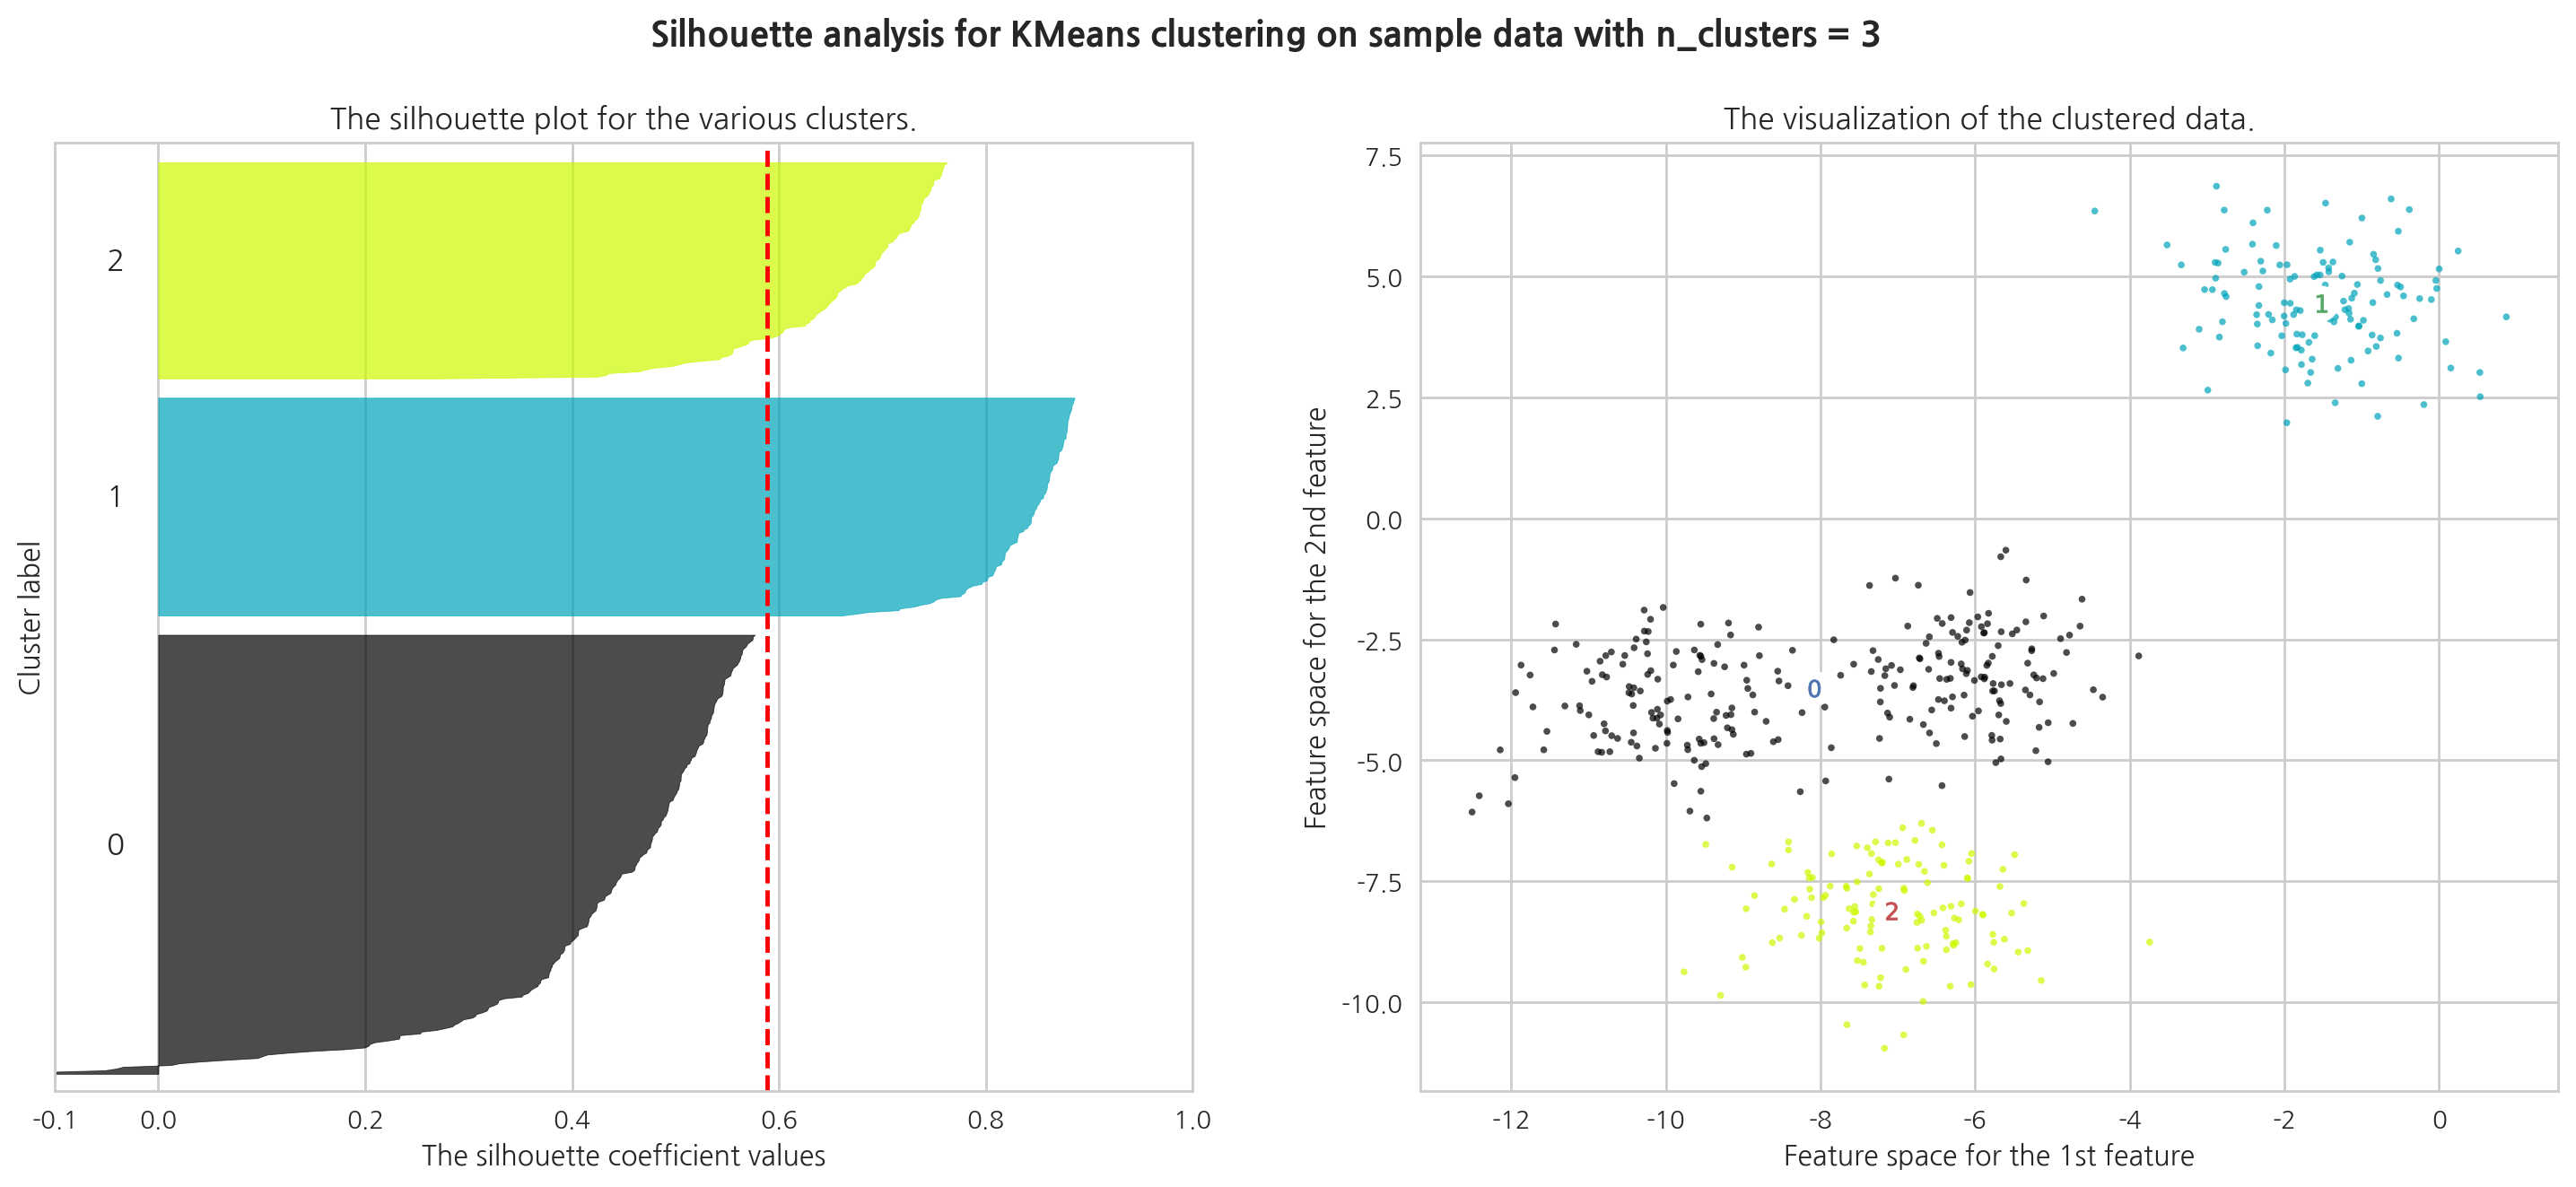

For n_clusters = 4 The average silhouette_score is : 0.650518663273


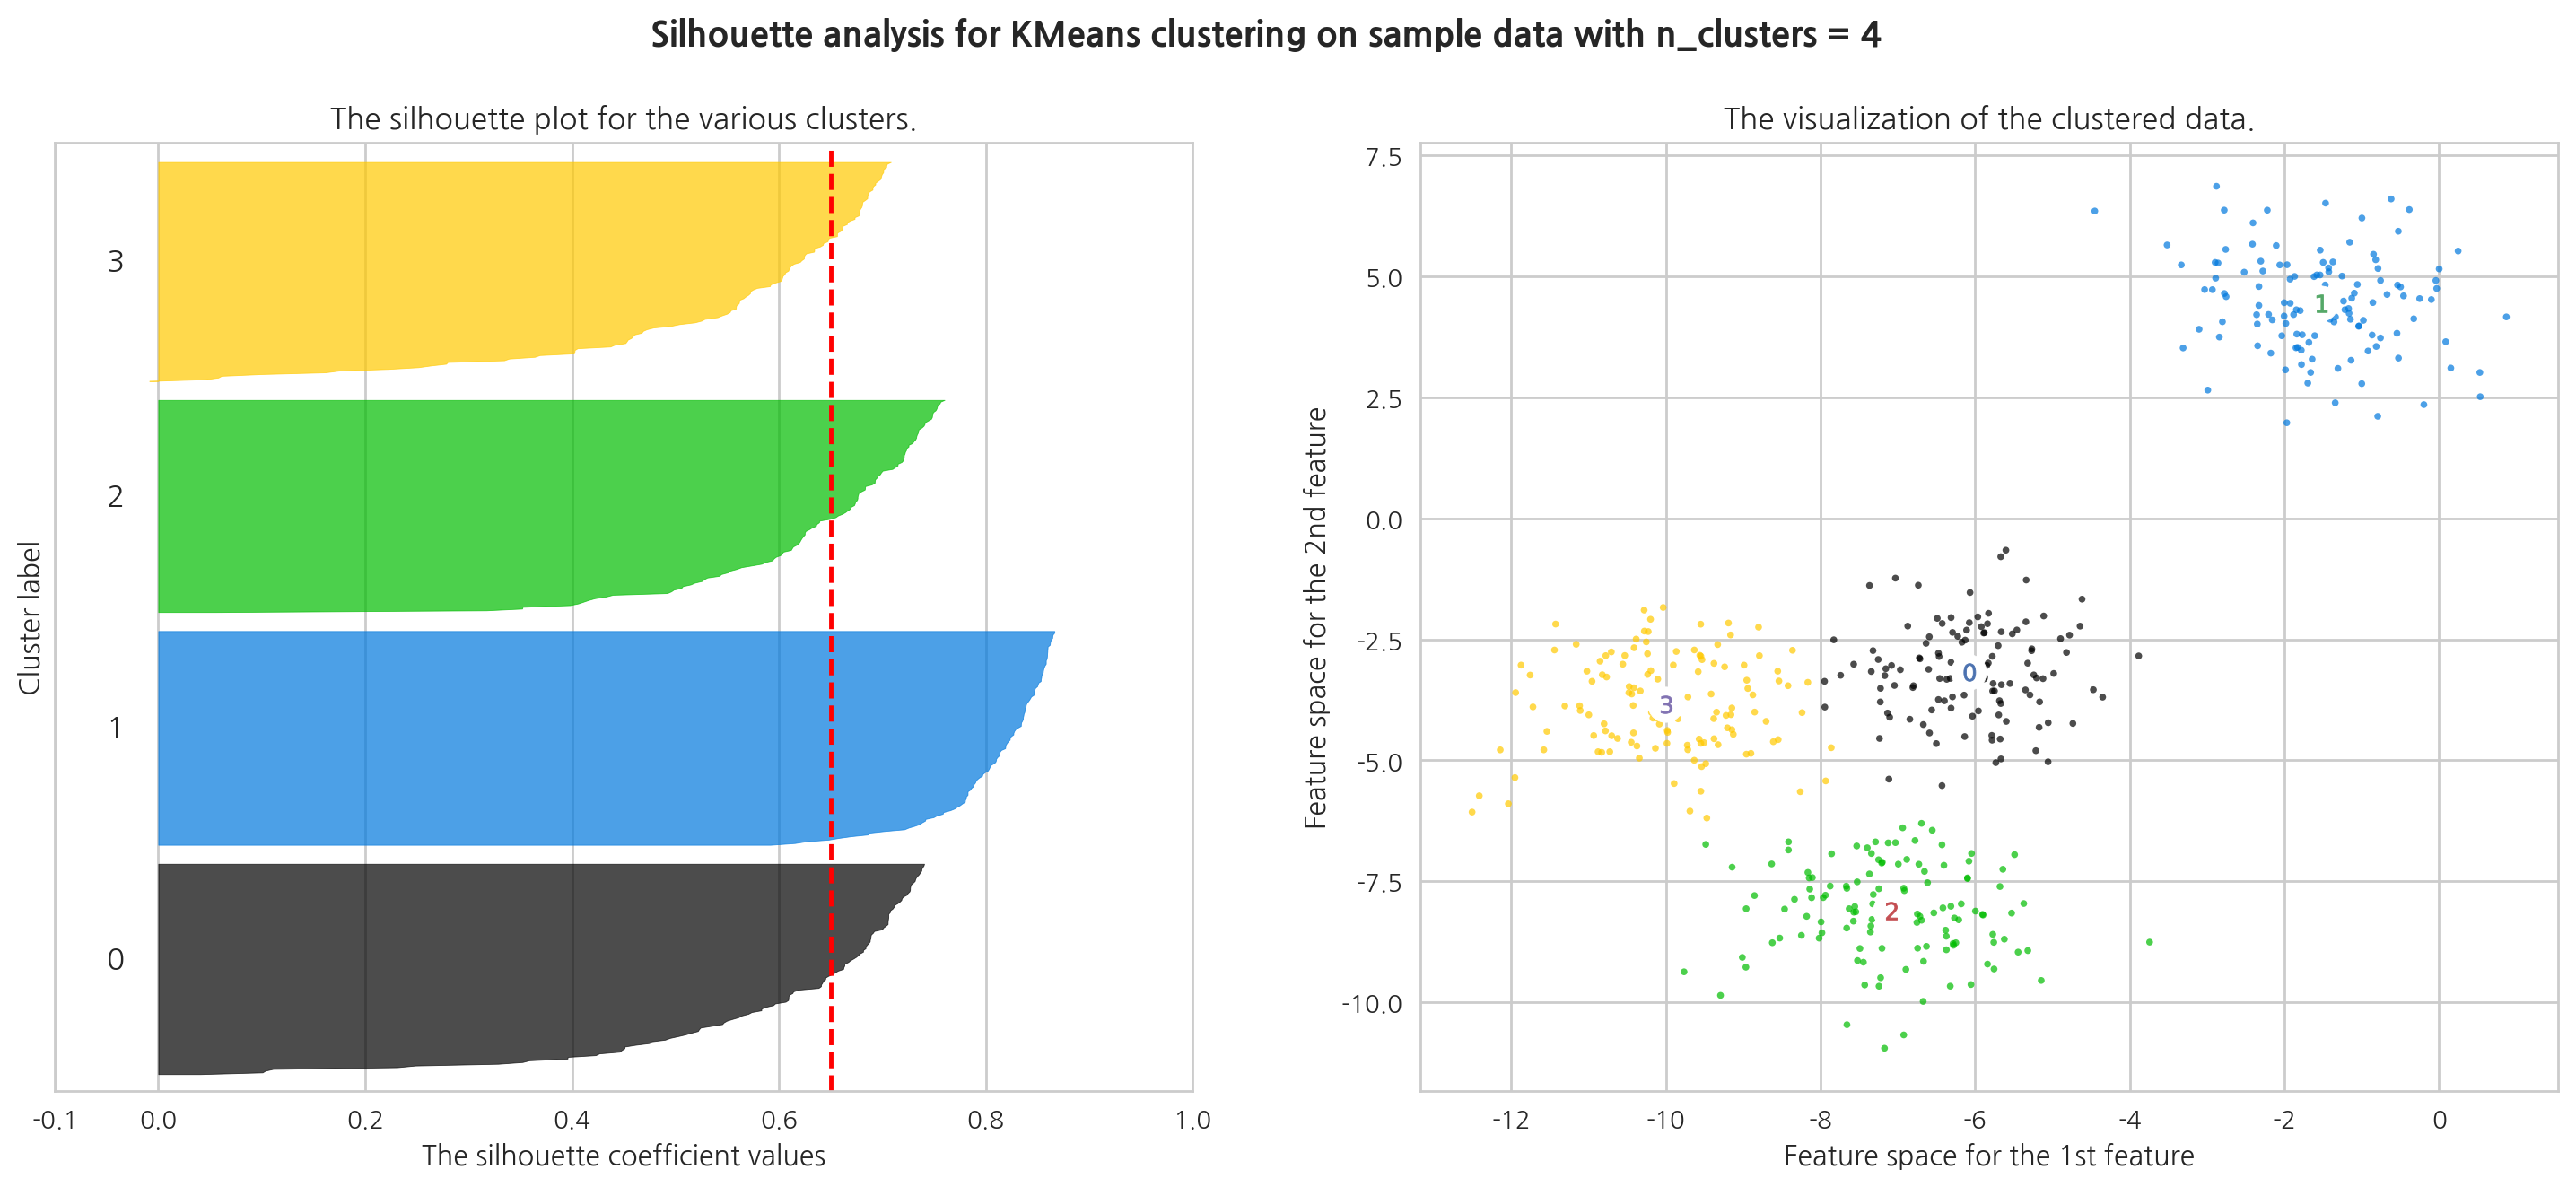

For n_clusters = 5 The average silhouette_score is : 0.563764690262


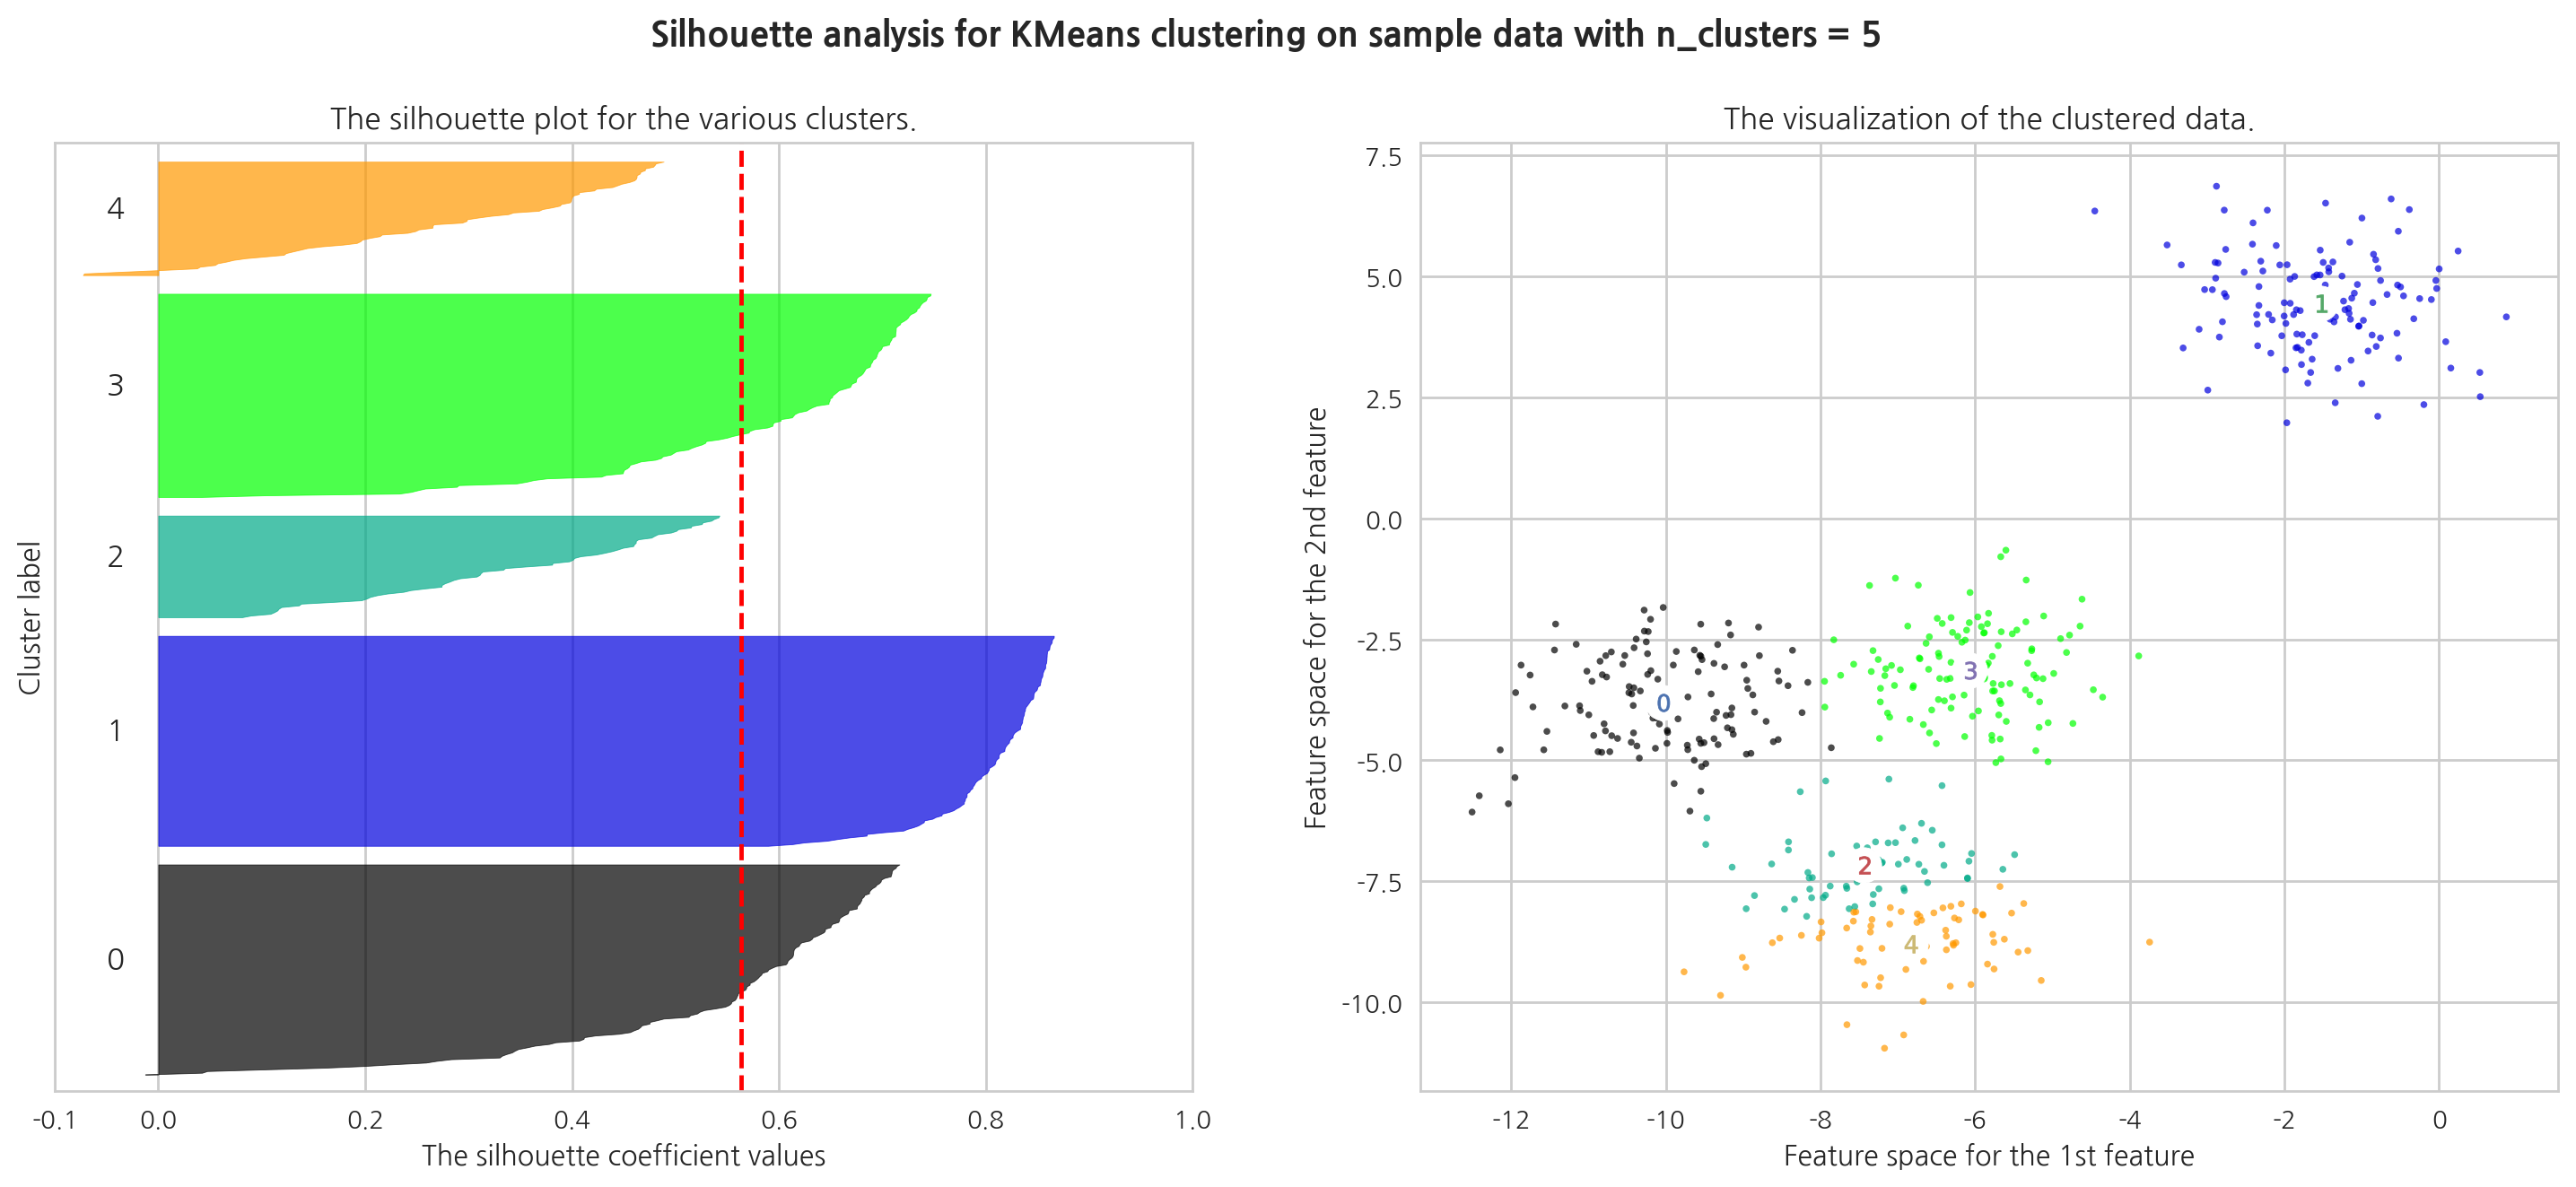

For n_clusters = 6 The average silhouette_score is : 0.450466629437


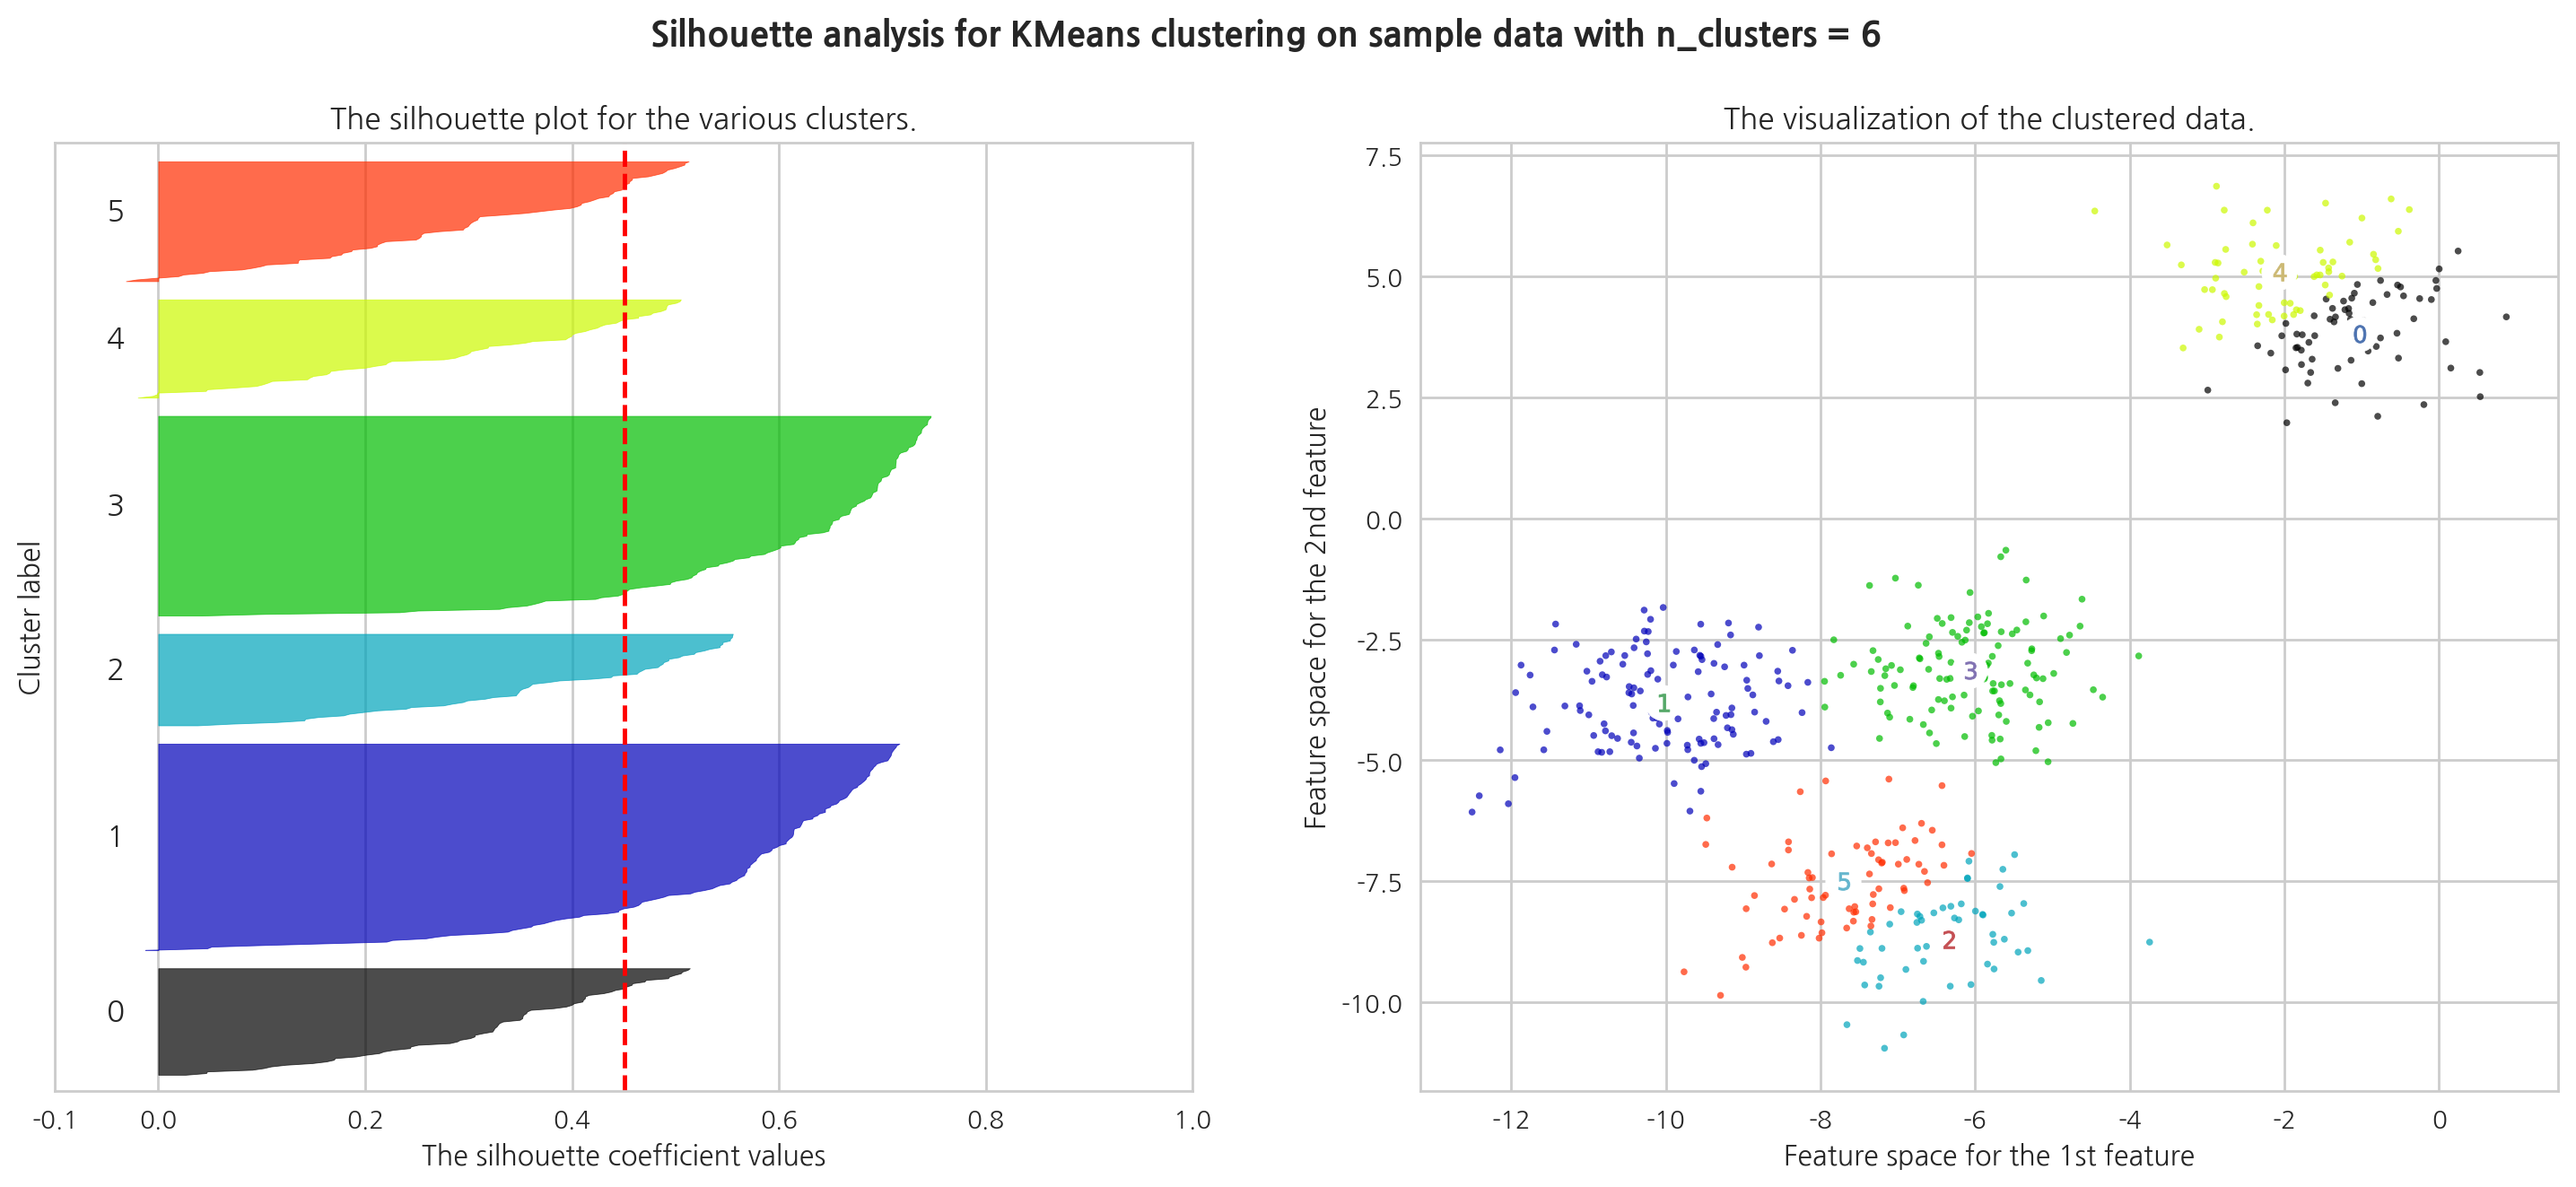

In [21]:
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm

# Generating the sample data from make_blobs
# This particular setting has one distinct cluster and 3 clusters placed close
# together.
X, y = make_blobs(n_samples=500,
                  n_features=2,
                  centers=4,
                  cluster_std=1,
                  center_box=(-10.0, 10.0),
                  shuffle=True,
                  random_state=1)  # For reproducibility

range_n_clusters = [2, 3, 4, 5, 6]

for n_clusters in range_n_clusters:
    # Create a subplot with 1 row and 2 columns
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.set_size_inches(18, 7)

    # The 1st subplot is the silhouette plot
    # The silhouette coefficient can range from -1, 1 but in this example all
    # lie within [-0.1, 1]
    ax1.set_xlim([-0.1, 1])
    # The (n_clusters+1)*10 is for inserting blank space between silhouette
    # plots of individual clusters, to demarcate them clearly.
    ax1.set_ylim([0, len(X) + (n_clusters + 1) * 10])

    # Initialize the clusterer with n_clusters value and a random generator
    # seed of 10 for reproducibility.
    clusterer = KMeans(n_clusters=n_clusters, random_state=10)
    cluster_labels = clusterer.fit_predict(X)

    # The silhouette_score gives the average value for all the samples.
    # This gives a perspective into the density and separation of the formed
    # clusters
    silhouette_avg = silhouette_score(X, cluster_labels)
    print("For n_clusters =", n_clusters,
          "The average silhouette_score is :", silhouette_avg)

    # Compute the silhouette scores for each sample
    sample_silhouette_values = silhouette_samples(X, cluster_labels)

    y_lower = 10
    for i in range(n_clusters):
        # Aggregate the silhouette scores for samples belonging to
        # cluster i, and sort them
        ith_cluster_silhouette_values = \
            sample_silhouette_values[cluster_labels == i]

        ith_cluster_silhouette_values.sort()

        size_cluster_i = ith_cluster_silhouette_values.shape[0]
        y_upper = y_lower + size_cluster_i

        color = cm.spectral(float(i) / n_clusters)
        ax1.fill_betweenx(np.arange(y_lower, y_upper),
                          0, ith_cluster_silhouette_values,
                          facecolor=color, edgecolor=color, alpha=0.7)

        # Label the silhouette plots with their cluster numbers at the middle
        ax1.text(-0.05, y_lower + 0.5 * size_cluster_i, str(i))

        # Compute the new y_lower for next plot
        y_lower = y_upper + 10  # 10 for the 0 samples

    ax1.set_title("The silhouette plot for the various clusters.")
    ax1.set_xlabel("The silhouette coefficient values")
    ax1.set_ylabel("Cluster label")

    # The vertical line for average silhouette score of all the values
    ax1.axvline(x=silhouette_avg, color="red", linestyle="--")

    ax1.set_yticks([])  # Clear the yaxis labels / ticks
    ax1.set_xticks([-0.1, 0, 0.2, 0.4, 0.6, 0.8, 1])

    # 2nd Plot showing the actual clusters formed
    colors = cm.spectral(cluster_labels.astype(float) / n_clusters)
    ax2.scatter(X[:, 0], X[:, 1], marker='.', s=30, lw=0, alpha=0.7,
                c=colors)

    # Labeling the clusters
    centers = clusterer.cluster_centers_
    # Draw white circles at cluster centers
    ax2.scatter(centers[:, 0], centers[:, 1],
                marker='o', c="white", alpha=1, s=200)

    for i, c in enumerate(centers):
        ax2.scatter(c[0], c[1], marker='$%d$' % i, alpha=1, s=50)

    ax2.set_title("The visualization of the clustered data.")
    ax2.set_xlabel("Feature space for the 1st feature")
    ax2.set_ylabel("Feature space for the 2nd feature")

    plt.suptitle(("Silhouette analysis for KMeans clustering on sample data "
                  "with n_clusters = %d" % n_clusters),
                 fontsize=14, fontweight='bold')

    plt.show()